Spam comments on YouTube videos are not just annoying; they can also skew engagement metrics and mislead viewers. This dataset provides an opportunity to delve into the nature of these spam comments and potentially build a model to predict them. If you find this notebook useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
file_path = '/kaggle/input/youtube-comments-spam-dataset/Youtube-Spam-Dataset.csv'
df = pd.read_csv(file_path)

### Initial Exploration

In [4]:
# Display the first few rows of the dataset
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


### Data Cleaning and Preprocessing

In [5]:
# Check for missing values
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

### Exploratory Data Analysis

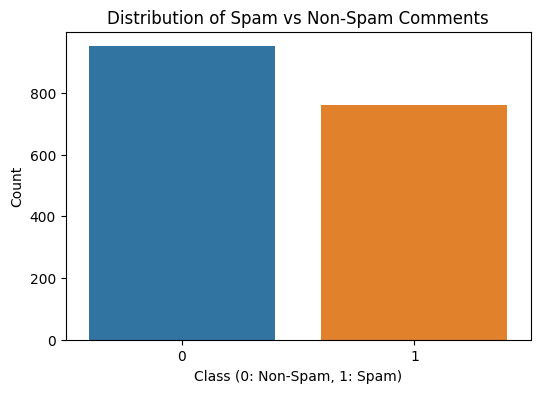

In [7]:
# Distribution of spam vs non-spam comments
plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Spam vs Non-Spam Comments')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

### Feature Engineering

In [8]:
# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [9]:
# Extract features from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day
df['HOUR'] = df['DATE'].dt.hour

### Correlation Analysis

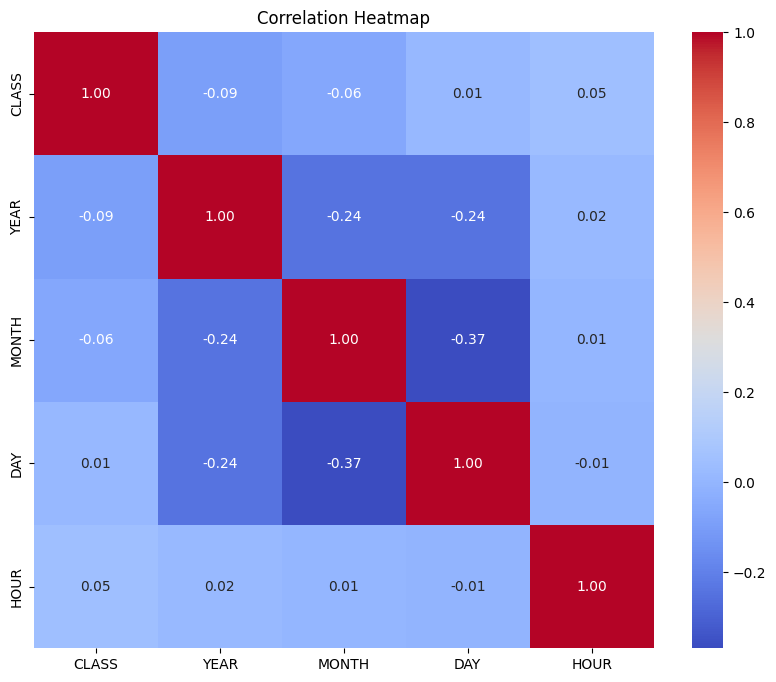

In [10]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Text Vectorization

In [11]:
# Vectorize the 'CONTENT' column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['CONTENT'])
y = df['CLASS']

### Model Building

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Model Evaluation

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


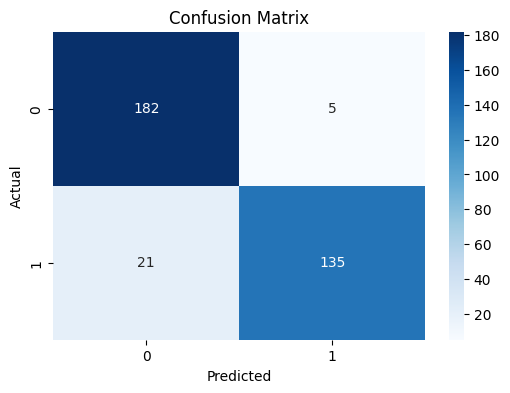

In [16]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       187
           1       0.96      0.87      0.91       156

    accuracy                           0.92       343
   macro avg       0.93      0.92      0.92       343
weighted avg       0.93      0.92      0.92       343



### Future Analysis

What other features do you think could improve the model? Perhaps analyzing the length of comments or the frequency of certain keywords could provide additional insights. Let me know your thoughts.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)